In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastai.text import *

In [63]:
path = Path('/home/paperspace/suicides')

In [107]:
text_df = pd.read_csv(path/'data/disch_full.csv')
text_df = text_df.drop('CHARTTIME',axis=1) # they're all missing
text_df.head(5)

SUBJECT_ID,HADM_ID,CHARTTIME,TEXT
22532,167853,,"admission date discharge date service addendum radiologic studies radiologic studies also included a chest ct which confirmed cavitary lesions in the left lung apex consistent with infectious process tuberculosis this also moderate sized left pleural effusion head ct head ct showed no intracranial hemorrhage or mass effect but old infarction consistent with past medical history abdominal ct abdominal ct showed lesions of t10 and sacrum most likely secondary to osteoporosis these can be followed by repeat imaging as an outpatient first name8 namepattern2 first name4 namepattern1 last name namepattern1 m d md number dictated by hospital medquist36 d t job job number"
13702,107527,,"admission date discharge date date of birth sex f service micu and then to doctor last name medicine history of present illness this is an year old female with a history of emphysema not on home o2 who presents with three days of shortness of breath thought by h

(50, 8173.712415342319, 46484)

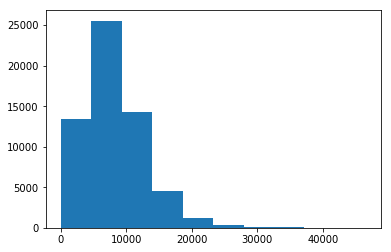

In [65]:
word_count = np.sort(text_df.TEXT.apply(len))
max_word_count = np.max(word_count)
mean_word_count = np.mean(word_count)
min_word_count = np.min(word_count)
plt.hist(word_count)
min_word_count, mean_word_count, max_word_count

In [83]:
labels_df = pd.read_csv(path/'data/suicide_class.csv')
labels_df['labels'] = 1
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
SUBJECT_ID    608 non-null int64
labels        608 non-null int64
dtypes: int64(2)
memory usage: 9.6 KB


In [104]:
df = pd.merge(text_df,labels_df,on='SUBJECT_ID',how='left')
df = df[['labels','TEXT','SUBJECT_ID','HADM_ID']]
df.columns = [col.lower() for col in df.columns]

df = df.fillna(0)
df[['labels','subject_id','hadm_id']] = df[['labels','subject_id','hadm_id']].astype(int)
df.head()

,labels,text,subject_id,hadm_id
0,0,admission date discharge date service addendum...,22532,167853
1,0,admission date discharge date date of birth se...,13702,107527
2,0,admission date discharge date service cardioth...,13702,167118
3,0,admission date discharge date service medicine...,13702,196489
4,0,admission date discharge date date of birth se...,26880,135453


In [105]:
df.labels.value_counts()

0    58736
1      916
Name: labels, dtype: int64

In [106]:
df.subject_id[df.labels == 1].unique().shape

(580,)